In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets, neighbors, metrics


In [1]:
print('testing')

testing


In [2]:
iris = datasets.load_iris()
iris.data


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

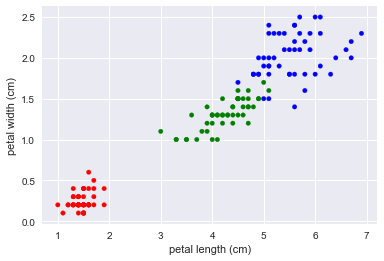

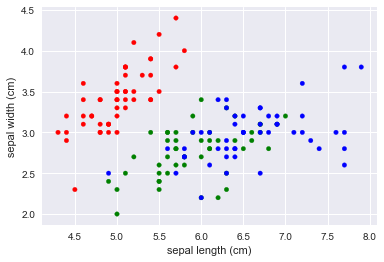

In [3]:
# iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names) #converting to dataframe
irisdf['target'] = iris.target #0,1,2 depending on flower type.
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)]) #where x is the target, apply the colour
irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
irisdf.plot('sepal length (cm)', 'sepal width (cm)', kind='scatter', c=irisdf.ctarget)

In [5]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,ctarget
0,5.1,3.5,1.4,0.2,0,r
1,4.9,3.0,1.4,0.2,0,r
2,4.7,3.2,1.3,0.2,0,r
3,4.6,3.1,1.5,0.2,0,r
4,5.0,3.6,1.4,0.2,0,r


In [6]:
#use petal length and petal width to cluster the observations into 3 clusters.
kmeans = KMeans(n_clusters=3, random_state=0).fit(iris.data[:,2:]) 
#random state is the number of random centroids you want the model to use 

In [8]:
kmeans.labels_ #labels based on the cluster result 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
kmeans.cluster_centers_ #this is the x and y values for each cluster.

array([[ 1.464     ,  0.244     ],
       [ 5.59583333,  2.0375    ],
       [ 4.26923077,  1.34230769]])

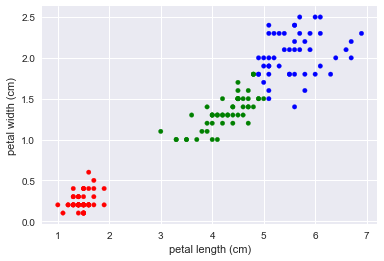

In [7]:
#Plotting the cluster result 
#You can see that the overlap between green and blue in the actual data has been removed 

irisdf['cluster'] = kmeans.labels_
cmap = {'0': 'r', '2': 'g', '1': 'b' }
irisdf['ccluster'] = irisdf.cluster.apply(lambda x: cmap[str(x)])
irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ccluster)

### Choosing K using Elbow and silhouette methods 

In [17]:
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import numpy as np

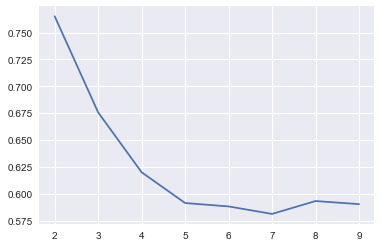

In [15]:
#SILHOUETTE METHOD 
# look for max value (which shows greatest separation between the clusters.)
sil_coeff = []
k_values = range(2, 10)
for n_cluster in k_values:
    kmeans = KMeans(n_clusters=n_cluster).fit(iris.data[:,2:]) #change to 1 to include an extra feature
    label = kmeans.labels_
    sil_coeff.append(silhouette_score(iris.data[:,2:], label, metric ='manhattan')) # metric='euclidean'
    
plt.plot(k_values,sil_coeff)

In [45]:
#BC pulling apart elbow to understand the calculation 
# dataframe['optional column/s'].drop_duplicates() 

print(irisdf.columns[2]) # petal length
print(irisdf.columns[3]) # petal width

#print((kmeans.cluster_centers_))

# choices = ['pizza', 'pasta', 'salad', 'nachos']
# print ('Your choices are:')
# for index, item in enumerate(choices):
#     print (index+1, item)
    
for e, c in enumerate(kmeans.cluster_centers_): #e is the index and c is a list of mean petal length's and width's
        #val = sum each observations variance from the mean 
    val += ((irisdf[irisdf.cluster == e][irisdf.columns[2]] - c[0])**2 # sum all (+=) and then take the sqrt
                                                                       # when K = Index then 
                                                                       # (petal lgth - mean petal lgth)**2
            + (irisdf[irisdf.cluster == e][irisdf.columns[3]] - c[1])**2).apply(np.sqrt).sum()
                                                                       # + when K = Index then 
                                                                       #(petal width - mean petal width)**2 
                                                                        
    print('e=',e,' c=',c,' val=',val)

        

petal length (cm)
petal width (cm)
e= 0  c= [ 4.96470588  1.75294118]  val= 209.54416330116152
e= 1  c= [ 1.37575758  0.2030303 ]  val= 213.31874331757152
e= 2  c= [ 3.41428571  1.05714286]  val= 214.79392218913557
e= 3  c= [ 5.79230769  2.3       ]  val= 217.65264142755743
e= 4  c= [ 4.06666667  1.24444444]  val= 220.74445107476072
e= 5  c= [ 6.52857143  2.04285714]  val= 222.61772083124808
e= 6  c= [ 5.26  2.17]  val= 224.66749882859284
e= 7  c= [ 1.63529412  0.32352941]  val= 227.34042771193705
e= 8  c= [ 4.55714286  1.43333333]  val= 230.64498227649196
e= 9  c= [ 5.68571429  1.71428571]  val= 232.13129154797397


In [20]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),dist,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,8
4,5.0,3.6,1.4,0.2,0,0


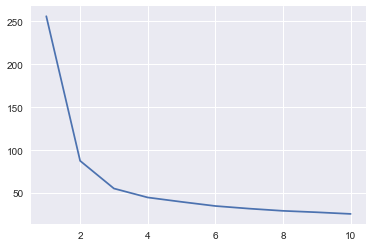

In [29]:
#ELBOW METHOD 
# looking for the smallest error (which shows the compactness of observations within the cluster.)

## NB gridsearch isn't used for clustering/ unsupervised learning. This is because gridsearch runs through parameters to find 
## the best model.  In regression it is possible to use r2 to determine the best model.  But in clustering, the "best" model is 
## more intuitive, it is a combination of minimising the error and having a logical/ usable clusters which drive insight.

irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
features = ['petal length (cm)','petal width (cm)']
wk_coeff = []
k_values = range(1, 11)
irisdf['dist'] = 0
for n_cluster in k_values:
    wkcluster_coeff = []
    kmeans = KMeans(n_clusters=n_cluster).fit(irisdf[features])
    irisdf['cluster'] = kmeans.labels_
    val = 0
    for e, c in enumerate(kmeans.cluster_centers_): #e is the index and c is the centre value 
        #sum each observations variance from the mean 
        val += ((irisdf[irisdf.cluster == e][irisdf.columns[2]] - c[0])**2 + # c[0] is the x value for the predicted cluster 
                                                                             # col[2] = petal length           
        (irisdf[irisdf.cluster == e][irisdf.columns[3]] - c[1])**2).apply(np.sqrt).sum()
    wk_coeff.append(val)

plt.plot(k_values,wk_coeff)

In [17]:
#HIERARCHICAL CLUSTERING
features = ['petal length (cm)','petal width (cm)']
cluster_ml = AgglomerativeClustering(n_clusters=3).fit(irisdf[features])

In [18]:
cluster_ml

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=3,
            pooling_func=<function mean at 0x0000000004C6FE18>)

In [19]:
cluster_ml.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Cophenetic Distance: 0.876696652921


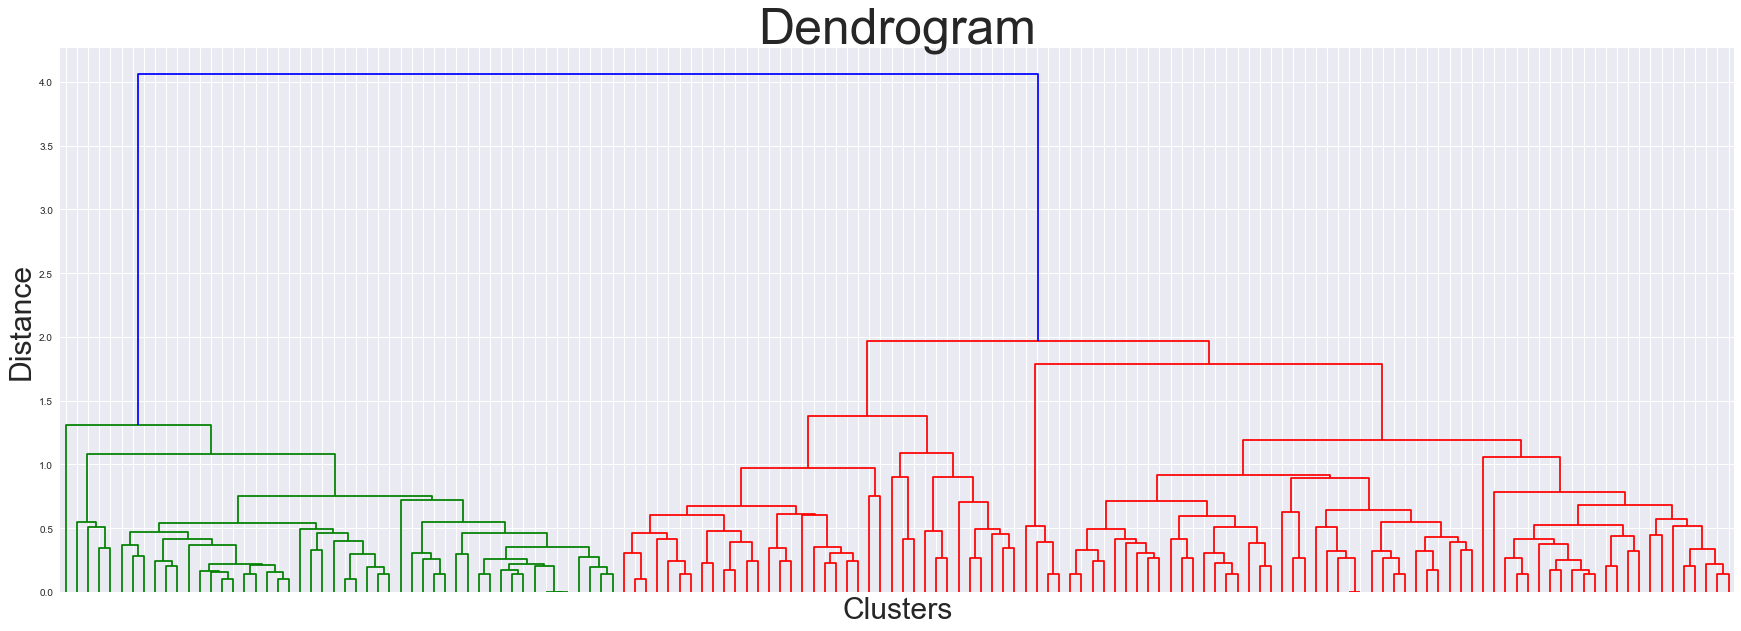

In [22]:
##using scypy which is an alternative for plotting and good for hierarchial as it can show the dendogram
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram,fcluster
from scipy.spatial.distance import pdist
## Create linkages
Z = linkage(irisdf.ix[:,0:4], 'average') # this is the method for calculating distance.
c, coph_dists = cophenet(Z, pdist(irisdf.ix[:,0:4]))
print ("Coefficient Distance:",c) # this tells you if the distance 

## Plotting of the Dendrogram 
plt.figure(figsize=(30, 10))
plt.title('Dendrogram',fontsize=50)
plt.xlabel('Clusters',fontsize=30)
plt.ylabel('Distance',fontsize=30)
dendrogram(Z,
           leaf_rotation=0.,
           leaf_font_size=18.,
           color_threshold = 4)
## Remove the X-ticks as they are fairly meaningless
plt.tick_params(
    axis='x',       
    which='both',   
    bottom='off',     
    top='off',         
    labelbottom='off')
plt.show()

In [108]:
cluster_ml.cluster_centers_ #THIS WILL ERROR BECAUSE HIERARCHICAL CLUSTERING DOESN'T GENERATE CENTROIDS

AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

## Practice  
Create a cluster based on Pclass and Age from the Titanic dataset.

In [5]:
dfT = pd.read_csv('C:/Users/BeckyC/Desktop/Data Science - GA files/titanic.csv')

In [6]:
##Removing records with Null age.
print(len(dfT))
pd.isnull(dfT['Age']).sum() 
df_nonull =dfT[dfT['Age'].notnull()]


891


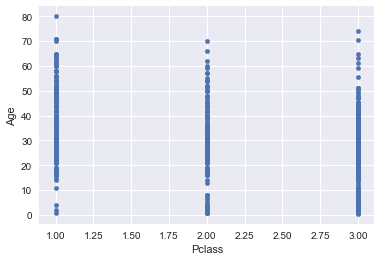

In [45]:
df_nonull.plot(x='Pclass', y='Age',kind = 'scatter')

#NB shouldn't use categorical data for clustering, but Pclass is sort of continous as there is a relationship; 1 is better than 2 etc

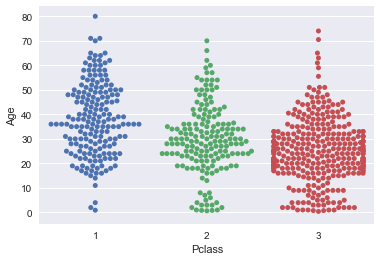

In [8]:
#sns.violinplot(data=df_nonull, x='Pclass', y='Age')
sns.swarmplot(data=df_nonull, x='Pclass', y='Age') #Swarm and violin plots are good scatter diagrams when comparing a categorical
                                                    #variable against a a continuous
                                                    #because the width of the plot shows you density, which doesn't come through 
                                                    #in the scatter plot above.

In [64]:
#checking location of columns for the model iterations
print(df_nonull.columns[2])
print(df_nonull.columns[5])

Pclass
Age


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


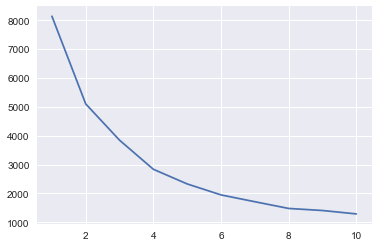

In [59]:
#ELBOW METHOD 
# looking for the smallest error (which shows the compactness of observations within the cluster- intracluster)
features = ['Age','Pclass']
wk_coeff = []
k_values = range(1, 11)
#df_nonull['dist'] = 0 # Creates new variable "Dist" in df_nonull and populates with zero, can't see where this is used?

for n_cluster in k_values:
    wkcluster_coeff = []
    kmeans = KMeans(n_clusters=n_cluster).fit(df_nonull[features])
    df_nonull['cluster'] = kmeans.labels_
    val = 0
    for e, c in enumerate(kmeans.cluster_centers_): #e is the index and c has two columns, [0] = mean age, [1] = mean Pclass
        val += ((df_nonull[df_nonull.cluster == e][df_nonull.columns[5]] - c[0])**2 + 
        (df_nonull[df_nonull.cluster == e][df_nonull.columns[2]] - c[1])**2).apply(np.sqrt).sum() # if cluster = index from list of means
                                                                                                  
    wk_coeff.append(val)

plt.plot(k_values,wk_coeff)

           

Observations: Looks like there is an elbow at 4?? What does the plot of 4 clusters look like...

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


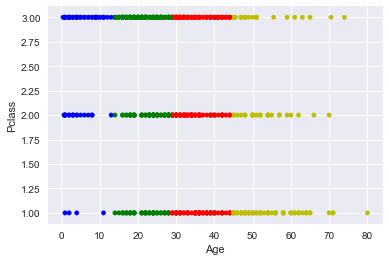

In [61]:
kmeans = KMeans(n_clusters=4).fit(df_nonull[features])
df_nonull['cluster'] = kmeans.labels_

cmap = {'0': 'r', '2': 'g', '1': 'b','3':'y' }
df_nonull['ccluster'] = df_nonull.cluster.apply(lambda x: cmap[str(x)])
df_nonull.plot('Age', 'Pclass', kind='scatter', c=df_nonull.ccluster)

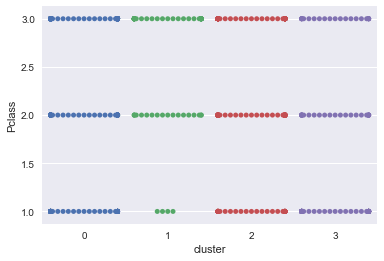

In [65]:
# sns.swarmplot(data=df_nonull, x='cluster', y='Age')
sns.swarmplot(data=df_nonull, x='cluster', y='Pclass')

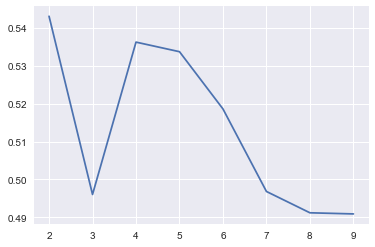

In [67]:
# Using silhouette to confirm K value... 

# look for max value (which shows greatest separation between the clusters.)
sil_coeff = []
k_values = range(2, 10) # this method needs at least 2 clusters.
for n_cluster in k_values:
    kmeans = KMeans(n_clusters=n_cluster).fit(df_nonull[features]) 
    label = kmeans.labels_
    sil_coeff.append(silhouette_score(df_nonull[features], label, metric ='manhattan')) # metric='euclidean'
    
plt.plot(k_values,sil_coeff)

Observations: this confirm that either 2 or 4 clusters seems to be the optimal K